In [275]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import jaccard_score
from sklearn.metrics.cluster import rand_score
from scipy.spatial.distance import pdist , squareform



In [276]:
#generate data set
n_samples = 300
random_state= 94

#data set1
X1,y1 = datasets.make_blobs(n_samples=n_samples,random_state=random_state)

data1 = pd.DataFrame(X1) #tabular data structure 
data1.columns = ['X', 'y'] #Change columns name

#data set2
X2, y2 = datasets.make_blobs(n_samples=n_samples,random_state=random_state) 
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X2 = np.dot(X2,transformation)

data2 = pd.DataFrame(X2)
data2.columns = ['X', 'y']

#data set3
X3, y3 = datasets.make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)

data3 = pd.DataFrame(X3)
data3.columns = ['X', 'y']

#data set4
X4,y4 = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=.05,random_state=random_state)

data4 = pd.DataFrame(X4)
data4.columns = ['X', 'y']
print(data4)

            X         y
0    0.416544  0.849542
1   -0.899699 -0.398779
2    0.204957 -1.015838
3    0.556109  0.811365
4   -0.413951  0.868013
..        ...       ...
295 -0.695047 -0.729633
296  0.605936 -0.011818
297  0.144296  0.490405
298 -0.103847  0.482988
299 -0.014518  0.571838

[300 rows x 2 columns]


Text(0.5, 1.0, 'data 4')

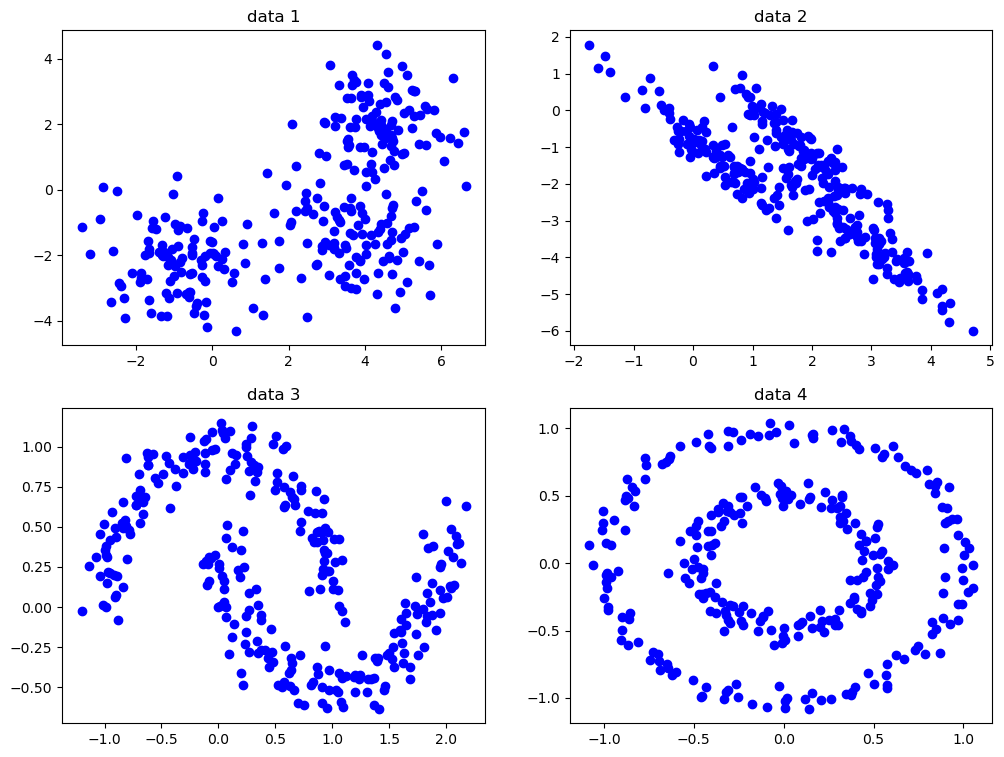

In [277]:
#Visualize data
fig, axes = plt.subplots(2, 2, figsize=(12,9))

axes[0][0].scatter(data1['X'], data1['y'], c = 'b')
axes[0][0].set_title("data 1")

axes[0][1].scatter(data2['X'], data2['y'], c = 'b')
axes[0][1].set_title("data 2")

axes[1][0].scatter(data3['X'], data3['y'], c = 'b')
axes[1][0].set_title("data 3")

axes[1][1].scatter(data4['X'], data4['y'], c = 'b')
axes[1][1].set_title("data 4")


# Kmean Algorithm

In [278]:
#apply function is used to apply function along an axis,
#and the possible value for axis (0 for row 'default', 1 for column)

def plotClusters(data,centroids): 
    plt.scatter(data['X'], data['y'],c= data['centroid'],cmap='gist_rainbow' ,alpha = 0.6)
    plt.scatter(centroids.T['X'], centroids.T['y'],  marker = 'o', s=90, 
           c= centroids.T.index,cmap='gist_rainbow',edgecolors='black')
    plt.title("Kmean")

# 1-Random initialization of the centroids from the data set
def initialize_centroids(clusters,data):
    centroids = []
    #To create number of centroid equal to the given number of cluster
    for i in range(clusters): 
        #Get a value from each column for the centroid
        centroid = data.apply(lambda x: float(x.sample())) #sample function take randomly single value 
        centroids.append(centroid) #Add centroid to centroids list
    return pd.concat(centroids, axis=1) #concat, used to merge two or more arrays

# 2-Calculate the SSE and set the point to the nearest centroid
def calculate_SSE(data, centroids):
    error = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return error.idxmin(axis=1) #idxmin, return index of the minimum element

# 3-update centroids
def update_centroids(k,data):
    #agg, allow us to apply mean function along the axis
    centroids = data.groupby('centroid').agg('mean').loc[:]
    return centroids.T #to return 2rows (x,y) and 3 colums (0,1,2)

In [279]:
def kmean(data,k):
    
    #initialize random centroid    
    centroids = initialize_centroids(3,data)
    
    #Calculate the error and get labels
    labels = calculate_SSE(data, centroids)
    
    #Add a new column to store the assigned centroids
    data['centroid'] = labels

    oldCentroids = [] #To stop the loop if there is no change in the centroid values
    iteration = 0
    
    # if iteration greater than 100 and old centroids 
    # equal update centroids, exit the loop
    while(iteration < 100 and not centroids.equals(oldCentroids)):
        oldCentroids = centroids
        #Update centroids
        centroids = update_centroids(3,data)
    
        labels = calculate_SSE(data, centroids)
        data['centroid']= labels
        iteration += 1
        
    print("\n",centroids.T,"\n")
    plotClusters(data,centroids)   
    return labels

In [280]:
def score(y_true,y_pred):
    #F-measure:
    Fscore = f1_score(y_true, y_pred, average='macro')

    #Normalized mutual information (NMI):
    NMI = normalized_mutual_info_score(y_true,y_pred)

    #Rand Statistic
    RandStatistic = rand_score(y_true,y_pred)
    
    return Fscore,NMI,RandStatistic

data1


                  X         y
centroid                    
0        -0.835640 -2.201552
1         3.736940 -1.499761
2         4.410187  2.040057 



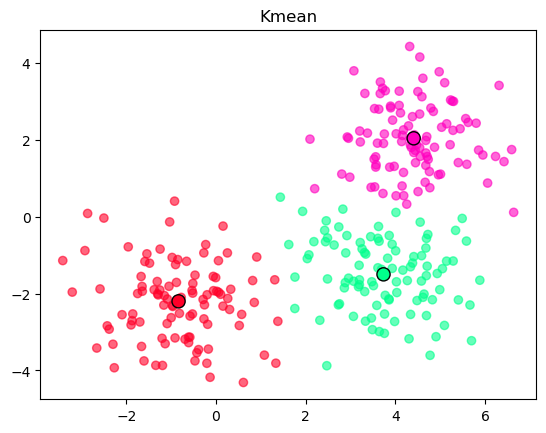

In [281]:
print("data1\n")
y_pred1 = kmean(data1,3)
K_f1,K_NMI1,K_R1= score(y1, y_pred1)

data2


                  X         y
centroid                    
0         0.313246 -0.393774
1         3.189888 -3.881746
2         1.723344 -1.753664 



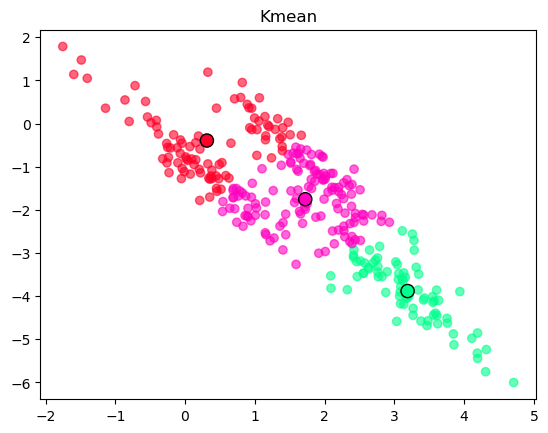

In [282]:
print("data2\n")
y_pred2 = kmean(data2,3)
K_f2,K_NMI2,K_R2= score(y2, y_pred2)

data3


                  X         y
centroid                    
0         0.554092  0.186114
1        -0.480735  0.638018
2         1.590951 -0.143666 



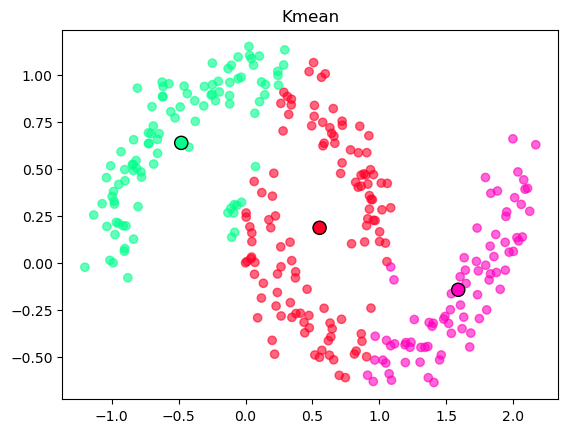

In [283]:
print("data3\n")
y_pred3 = kmean(data3,3)
K_f3,K_NMI3,K_R3= score(y3, y_pred3)

data4


                  X         y
centroid                    
0        -0.423251 -0.476118
1         0.603912 -0.131314
2        -0.209333  0.582602 



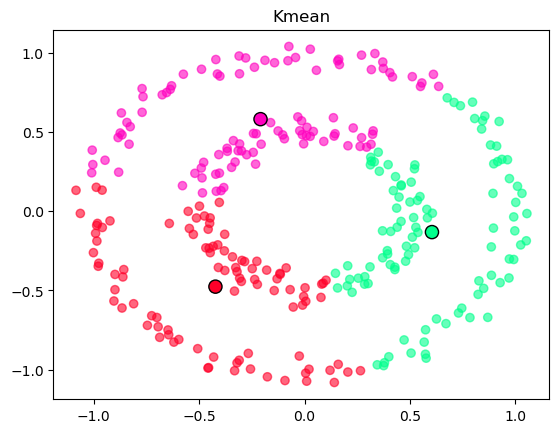

In [284]:
print("data4\n")
y_pred4 = kmean(data4,3)
K_f4,K_NMI4,K_R4= score(y4, y_pred4)

# DBSCAN Algorithm

In [285]:
def check_distance(D):
    dm = squareform(pdist(D, 'euclidean'))
    return dm

def check_epsilon_neighbors(dis,epsilon):
    return np.where(dis <= epsilon)[0]

def expand_cluster(neighbors, dist, cluster, labels,epsilon,min_samples):

    # Iterate for each neighbor of the point neighbors 
    for neighbor in neighbors:
      
      # Check that is not assigned
      if labels[neighbor] == -1:

        # Find neighbors of the neighbor 
        neighbors_of_the_neighbor = check_epsilon_neighbors(dist[neighbor],epsilon)
        
        # Check if neighbors > min_samples
        if len(neighbors_of_the_neighbor) >= min_samples:
            labels[neighbor] = cluster

            # For each neighbor in neighbors, expand cluster
            labels = expand_cluster(neighbors_of_the_neighbor, dist, cluster, labels,epsilon,min_samples)
        else:
            labels[neighbor] = -1
            
    return labels

def DBS(Data, epsilon ,min_samples):

    # Find distance
    dist_array = check_distance(Data)

    # Initialize cluster
    cluster = 0
    num_of_samples = Data.shape[0]#store the number of samples
    # Initialize a label that has the same size to the data points and fill it with -1 values
    labels = np.full(shape=num_of_samples, fill_value=-1)

    #iterate for each data point 
    for i in range(num_of_samples):
    
      # If sample or point not assigned to a cluster
      if labels[i] == -1:
        
        # Find the neighbors of the current point 
        neighbors = check_epsilon_neighbors(dist_array[i],epsilon)
        
        # Check if neighbors >= min_samples -->CORE point
        if len(neighbors) >= min_samples:
          
          # If point is not assigned to a cluster --> then Assign to cluster
          if labels[i] == -1:
            labels[i] = cluster

          # grow and expand cluster for the neighbors of the current point to be assign to the same cluster
          labels = expand_cluster(neighbors, dist_array, cluster, labels,epsilon,min_samples)

          # Go to next cluster          
          cluster = cluster + 1
        else: # else will be noise point
            labels[i] = -1
    #print(labels)
    return labels

In [286]:
def find_best_epslon_minpts(Data,minpts):
    from sklearn.neighbors import NearestNeighbors
    
    neigh = NearestNeighbors(n_neighbors=5)
    nbrs = neigh.fit(Data)
    distances, indices = nbrs.kneighbors(Data)

    distances = np.sort(distances, axis=0)
    distances = distances[:,minpts]#the ith neighbor
    
    plt.figure(figsize=(10,4))
    plt.plot(distances)
    plt.title('K-distance Graph',fontsize=10)
    plt.xlabel('Data Points sorted by distance',fontsize=10)
    plt.ylabel('Epsilon',fontsize=10)
    plt.show() 

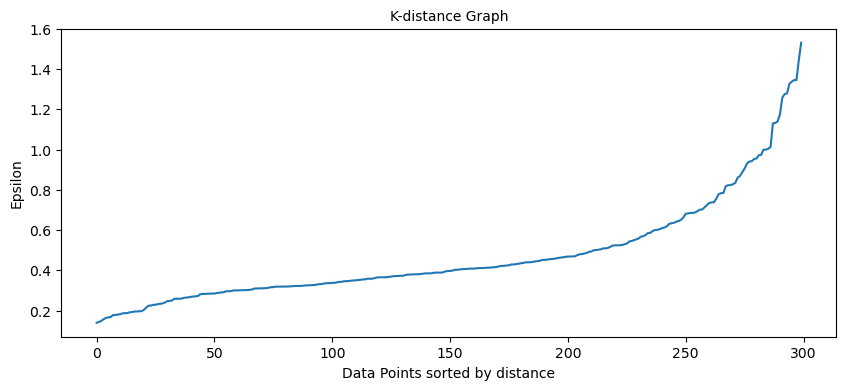

In [287]:
#for dataset 1 plotting epsilon values 
find_best_epslon_minpts(data1,4)

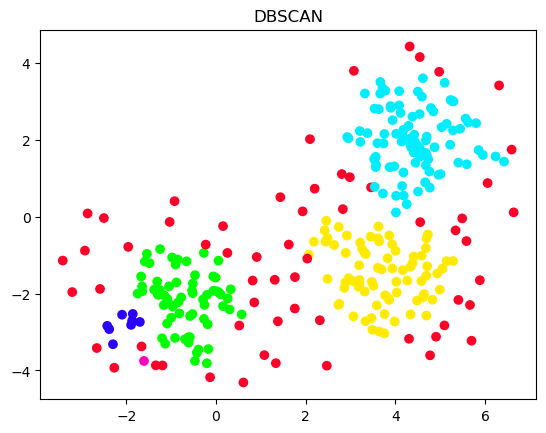

In [288]:
DB_y1 = DBS(data1[['X', 'y']],0.53,4)
plt.scatter(data1['X'],data1['y'],c = DB_y1 , cmap = 'gist_rainbow')
plt.title("DBSCAN")
DB_f1,DB_NMI1,DB_R1= score(y1, DB_y1)

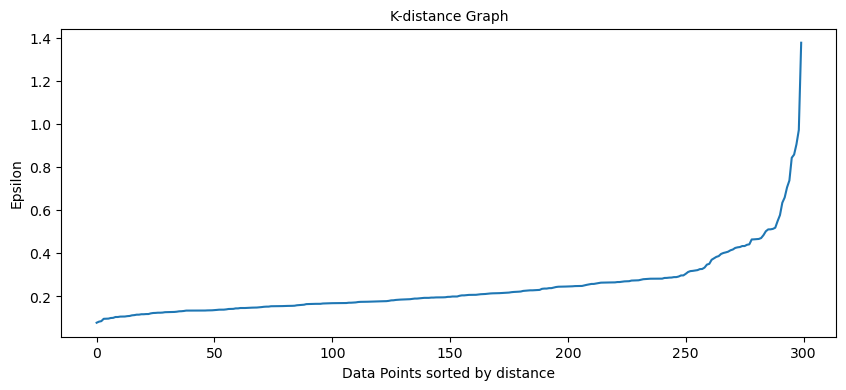

In [289]:
#for dataset 2 plotting epsilon values 
find_best_epslon_minpts(data2,4)

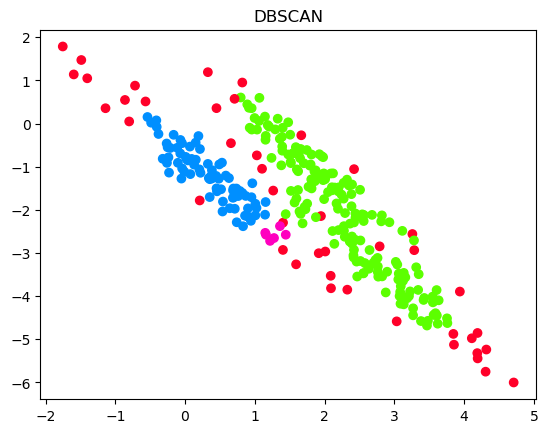

In [290]:
DB_y2 = DBS(data2[['X', 'y']],0.28,4)
plt.scatter(data2['X'],data2['y'],c = DB_y2 , cmap = 'gist_rainbow')
plt.title("DBSCAN")
DB_f2,DB_NMI2,DB_R2= score(y2, DB_y2)

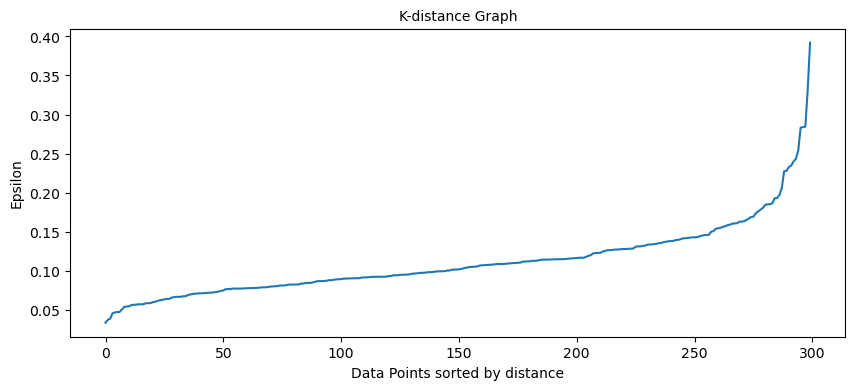

In [291]:
#for dataset 3 plotting epsilon values 
find_best_epslon_minpts(data3,4)

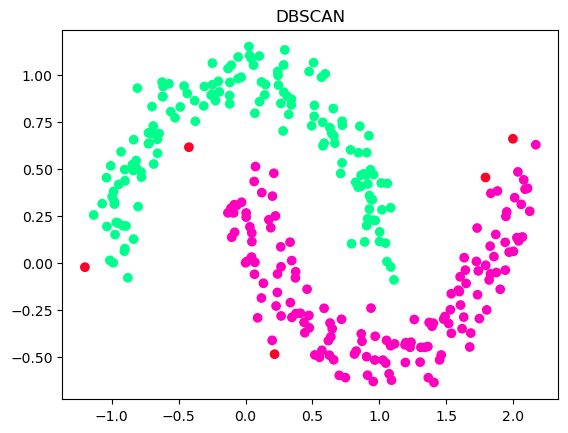

In [292]:
DB_y3 = DBS(data3[['X', 'y']],0.22,4)
plt.scatter(data3['X'],data3['y'],c = DB_y3 , cmap = 'gist_rainbow')
plt.title("DBSCAN")
DB_f3,DB_NMI3,DB_R3= score(y3, DB_y3)

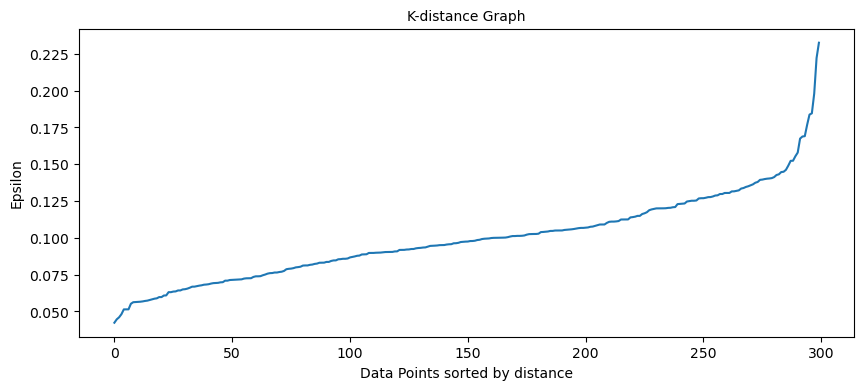

In [293]:
#for dataset 4 plotting epsilon values 
find_best_epslon_minpts(data4,4)

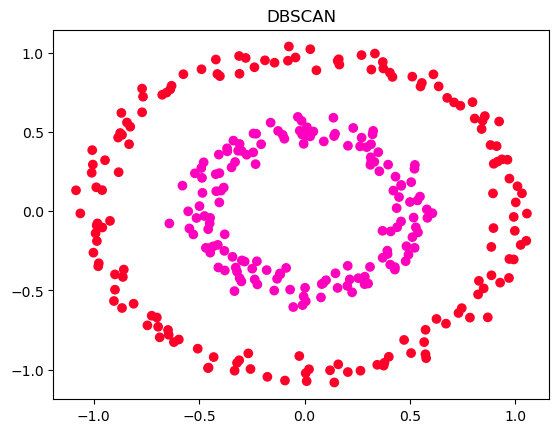

In [294]:
DB_y4 = DBS(data4[['X', 'y']],0.17,4)
plt.scatter(data4['X'],data4['y'],c = DB_y4 , cmap = 'gist_rainbow')
plt.title("DBSCAN")
DB_f4,DB_NMI4,DB_R4= score(y4, DB_y4)

# Hierarchal Algorithm

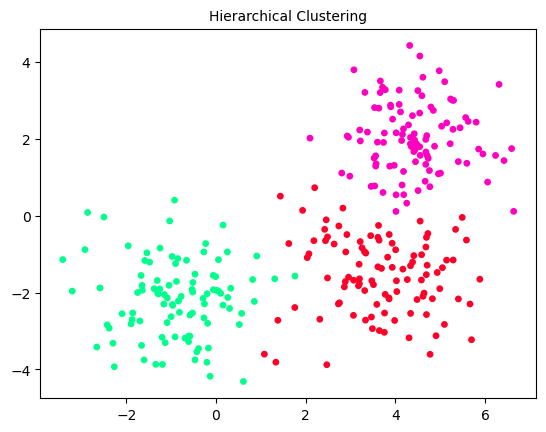

In [295]:
from sklearn.cluster import AgglomerativeClustering
H1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
H1.fit(data1[['X', 'y']])
H_y1 = H1.labels_

# Plotting Hierarchical Clustering
plt.scatter(data1['X'],data1['y'],c=H_y1,cmap = 'gist_rainbow',s=15)
plt.title('Hierarchical Clustering',fontsize=10)
H_f1,H_NMI1,H_R1= score(y1, H_y1)


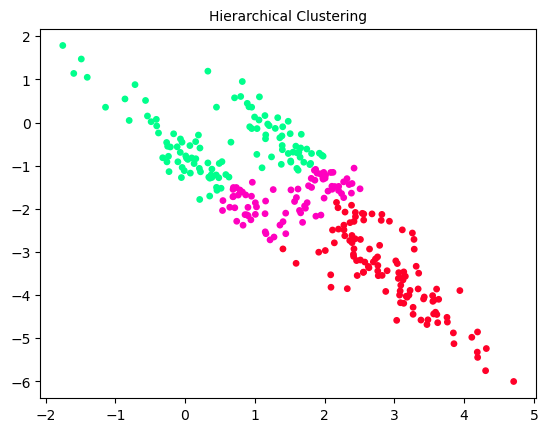

In [296]:
H2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
H2.fit(data2[['X', 'y']])
H_y2 = H2.labels_
# Plotting Hierarchical Clustering
plt.scatter(data2['X'],data2['y'],c= H_y2,cmap = 'gist_rainbow',s=15)
plt.title('Hierarchical Clustering',fontsize=10)
H_f2,H_NMI2,H_R2= score(y2, H_y2)

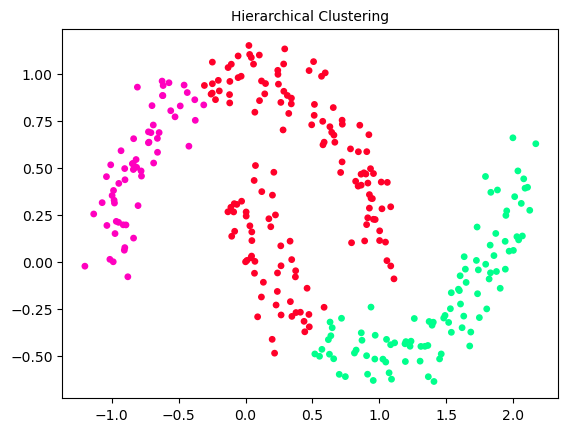

In [297]:
H3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
H3.fit(data3[['X', 'y']])
H_y3 = H3.labels_
# Plotting Hierarchical Clustering
plt.scatter(data3['X'],data3['y'],c=H_y3 ,cmap = 'gist_rainbow',s=15)
plt.title('Hierarchical Clustering',fontsize=10)
H_f3,H_NMI3,H_R3= score(y3, H_y3)

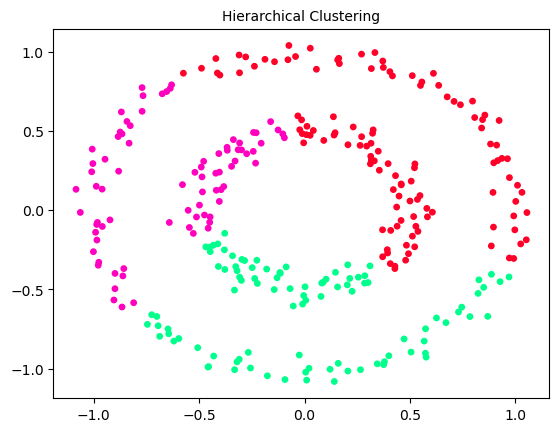

In [298]:
H4 = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
H4.fit(data4[['X', 'y']])
H_y4 = H4.labels_
# Plotting Hierarchical Clustering
plt.scatter(data4['X'],data4['y'],c=H_y4 ,cmap = 'gist_rainbow',s=15)
plt.title('Hierarchical Clustering',fontsize=10)
H_f4,H_NMI4,H_R4= score(y4, H_y4)

# GMM Algorithm

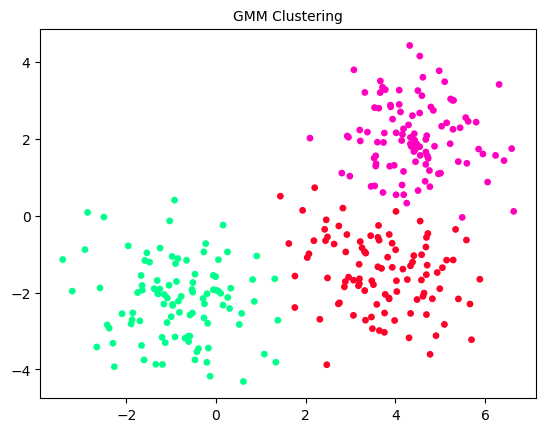

In [299]:
from sklearn.mixture import GaussianMixture
gmm1 = GaussianMixture(n_components=3).fit(data1[['X', 'y']])
GMM_y1 = gmm1.predict(data1[['X', 'y']])

# Plotting GMM Clustering
plt.scatter(data1['X'],data1['y'],c=GMM_y1 ,cmap='gist_rainbow',s=15)
plt.title('GMM Clustering',fontsize=10)
GMM_f1,GMM_NMI1,GMM_R1= score(y1, GMM_y1)

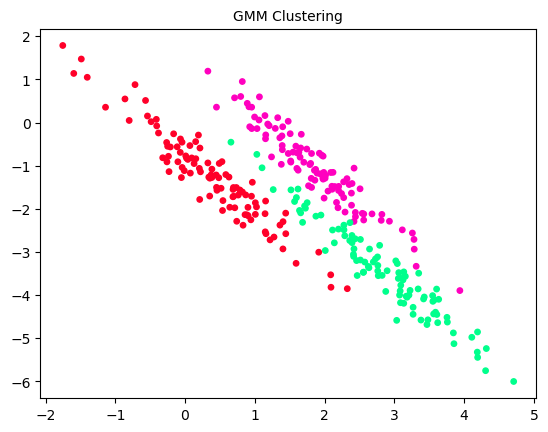

In [300]:
from sklearn.mixture import GaussianMixture
gmm2 = GaussianMixture(n_components=3).fit(data2[['X', 'y']])
GMM_y2 = gmm2.predict(data2[['X', 'y']])

# Plotting GMM Clustering
plt.scatter(data2['X'],data2['y'],c=GMM_y2 ,cmap='gist_rainbow',s=15)
plt.title('GMM Clustering',fontsize=10)
GMM_f2,GMM_NMI2,GMM_R2= score(y2, GMM_y2)

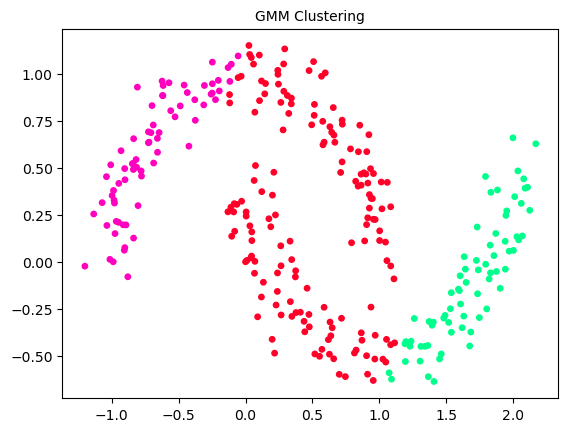

In [301]:
from sklearn.mixture import GaussianMixture
gmm3 = GaussianMixture(n_components=3).fit(data3[['X', 'y']])
GMM_y3 = gmm3.predict(data3[['X', 'y']])

# Plotting GMM Clustering
plt.scatter(data3['X'],data3['y'],c=GMM_y3,cmap='gist_rainbow',s=15)
plt.title('GMM Clustering',fontsize=10)
GMM_f3,GMM_NMI3,GMM_R3= score(y3, GMM_y3)

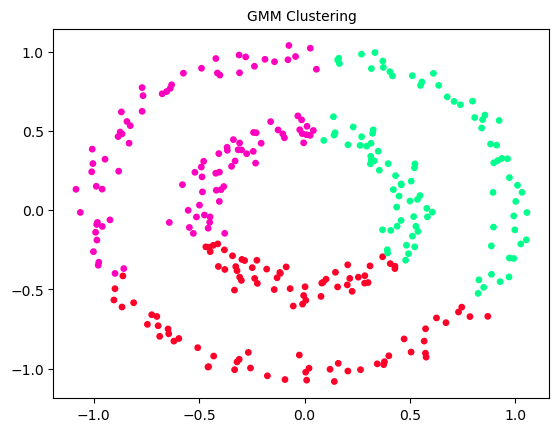

In [302]:
from sklearn.mixture import GaussianMixture
gmm4 = GaussianMixture(n_components=3).fit(data4[['X', 'y']])
GMM_y4 = gmm4.predict(data4[['X', 'y']])

# Plotting GMM Clustering
plt.scatter(data4['X'],data4['y'],c=GMM_y4,cmap='gist_rainbow',s=15)
plt.title('GMM Clustering',fontsize=10)
GMM_f4,GMM_NMI4,GMM_R4= score(y4, GMM_y4)

# summary

In [303]:
def summary(K_f, K_NMI, K_R,DB_f, DB_NMI,DB_R, H_f,H_NMI,H_R, G_f, G_NMI,G_R):
    table = [['K-mean_Data',K_f, K_NMI, K_R],
             ['DBSACN_Data',DB_f, DB_NMI,DB_R],
             ['Hierarchal_Data', H_f,H_NMI,H_R],
             ['GMM_Data', G_f, G_NMI,G_R]]
    df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI','Rand Statistic'])
    df_rank.set_index('Models')
    
    return df_rank

In [304]:
def ranking(data_rank,K_f, K_NMI, K_R,DB_f, DB_NMI,DB_R, H_f,H_NMI,H_R, G_f, G_NMI,G_R,S1):
    table = [[S1[0],K_f, K_NMI, K_R],
             [S1[1],DB_f, DB_NMI,DB_R],
             [S1[2],H_f, H_NMI,H_R],
             [S1[3],G_f, G_NMI,G_R]]

    data_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI','Rand Statistic'])
    data_rank['F-measures']=data_rank['F-measures'].rank(ascending=False)
    data_rank['NMI']=data_rank['NMI'].rank(ascending=False)
    data_rank['Rand Statistic']=data_rank['Rand Statistic'].rank(ascending=False)
    data_rank['rank'] = data_rank.mean(axis=1)
    data_rank['rank']=data_rank['rank'].rank(ascending=True)
    data_rank=data_rank.set_index('Models')
    return data_rank

In [305]:
#summary
table = [['K-mean_Data1',K_f1, K_NMI1, K_R1],
         ['DBSACN_Data1',DB_f1, DB_NMI1,DB_R1],
         ['Hierarchal_Data1',H_f1,H_NMI1,H_R1],
         ['GMM_Data1',GMM_f1,GMM_NMI1,GMM_R1],
         ['K-mean_Data2',K_f2, K_NMI2, K_R2],
         ['DBSACN_Data2',DB_f2, DB_NMI2,DB_R2],
         ['Hierarchal_Data2',H_f2,H_NMI2,H_R2],
         ['GMM_Data2',GMM_f2,GMM_NMI2,GMM_R2],
         ['K-mean_Data3',K_f3, K_NMI3, K_R3],
         ['DBSACN_Data3',DB_f3, DB_NMI3,DB_R3],
         ['Hierarchal_Data3',H_f3,H_NMI3,H_R3],
         ['GMM_Data3',GMM_f3,GMM_NMI3,GMM_R3],
         ['K-mean_Data4',K_f4, K_NMI4, K_R4],
         ['DBSACN_Data4',DB_f4, DB_NMI4,DB_R4],
         ['Hierarchal_Data4',H_f4,H_NMI4,H_R4],
         ['GMM_Data4',GMM_f4,GMM_NMI4,GMM_R4],
        ]
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank.set_index('Models')

,F-measures,NMI,Rand Statistic
Models,,,
K-mean_Data1,0.319865,0.882769,0.965329
DBSACN_Data1,0.003788,0.618888,0.832464
Hierarchal_Data1,0.016700,0.837765,0.948517
GMM_Data1,0.016735,0.861621,0.957035
K-mean_Data2,0.480803,0.330315,0.672999
DBSACN_Data2,0.192535,0.512193,0.726221
Hierarchal_Data2,0.190657,0.288414,0.681360
GMM_Data2,0.316498,0.861621,0.957035
K-mean_Data3,0.167839,0.321800,0.639398


In [306]:
#ranking the best model to dataset 1 
S1 = ['K-mean_Data1','DBSACN_Data1','Hierarchal_Data1', 'GMM_Data1']
s1 = summary(K_f1, K_NMI1, K_R1,DB_f1, DB_NMI1,DB_R1,H_f1,H_NMI1,H_R1, GMM_f1,GMM_NMI1,GMM_R1)
ranking(s1,K_f1, K_NMI1, K_R1,DB_f1, DB_NMI1,DB_R1,H_f1,H_NMI1,H_R1,GMM_f1,GMM_NMI1,GMM_R1,S1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-mean_Data1,1.0,1.0,1.0,1.0
DBSACN_Data1,4.0,4.0,4.0,4.0
Hierarchal_Data1,3.0,3.0,3.0,3.0
GMM_Data1,2.0,2.0,2.0,2.0


In [307]:
#ranking the best model to dataset 2
S2 = ['K-mean_Data2','DBSACN_Data2','Hierarchal_Data2', 'GMM_Data2']
s2= summary(K_f2, K_NMI2, K_R2,DB_f2, DB_NMI1,DB_R2, H_f2,H_NMI2,H_R2,GMM_f2,GMM_NMI2,GMM_R2)
ranking(s2,K_f2, K_NMI2, K_R2,DB_f2, DB_NMI1,DB_R2,H_f2,H_NMI2,H_R2,GMM_f2,GMM_NMI2,GMM_R2,S2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-mean_Data2,1.0,3.0,4.0,3.0
DBSACN_Data2,3.0,2.0,2.0,2.0
Hierarchal_Data2,4.0,4.0,3.0,4.0
GMM_Data2,2.0,1.0,1.0,1.0


In [308]:
#ranking the best model to dataset 3
S3 = ['K-mean_Data3','DBSACN_Data3','Hierarchal_Data3', 'GMM_Data3']
s3= summary(K_f3, K_NMI3, K_R3,DB_f3, DB_NMI3,DB_R3 ,H_f3,H_NMI3,H_R3, GMM_f3,GMM_NMI3,GMM_R3)
ranking(s3,K_f3, K_NMI3, K_R3,DB_f3, DB_NMI3,DB_R3,H_f3,H_NMI3,H_R3,GMM_f3,GMM_NMI3,GMM_R3,S3)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-mean_Data3,4.0,4.0,3.0,4.0
DBSACN_Data3,1.0,1.0,1.0,1.0
Hierarchal_Data3,2.0,2.0,2.0,2.0
GMM_Data3,3.0,3.0,4.0,3.0


In [309]:
#ranking the best model to dataset 4
S4 = ['K-mean_Data4','DBSACN_Data4','Hierarchal_Data4', 'GMM_Data4']
s4= summary(K_f4, K_NMI4, K_R4,DB_f4, DB_NMI4,DB_R4 , H_f4,H_NMI4,H_R4, GMM_f4,GMM_NMI4,GMM_R4)
ranking(s4,K_f4, K_NMI4, K_R4,DB_f4, DB_NMI4,DB_R4,H_f4,H_NMI4,H_R4,GMM_f4,GMM_NMI4,GMM_R4,S4)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-mean_Data4,3.0,4.0,4.0,4.0
DBSACN_Data4,1.0,1.0,1.0,1.0
Hierarchal_Data4,2.0,2.0,2.0,2.0
GMM_Data4,4.0,3.0,3.0,3.0
